### Introduction

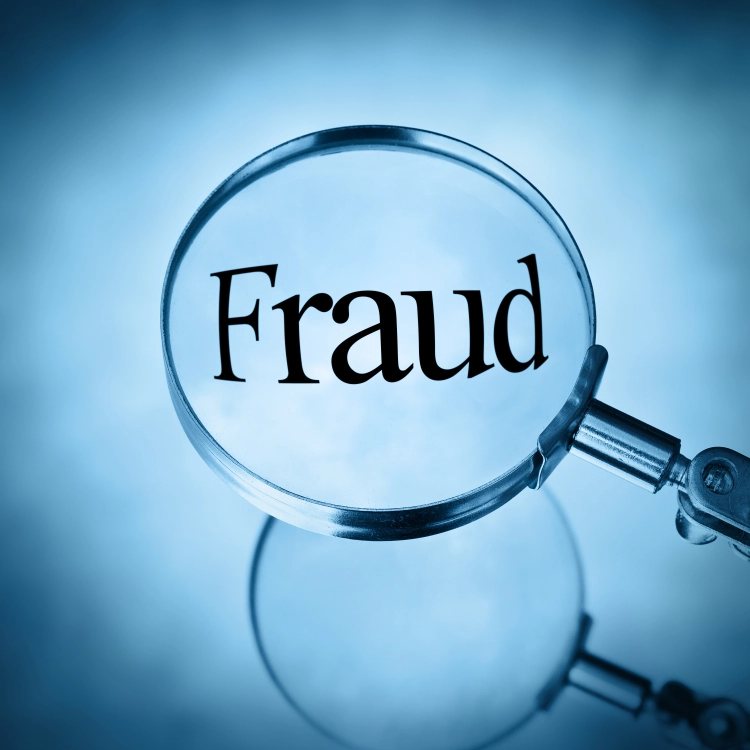
Credit card fraud is a significant problem that can result in huge financial losses for both credit card companies and consumers. To combat this problem, credit card companies have implemented various fraud detection techniques, such as rule-based systems, anomaly detection, and machine learning models. In recent years, machine learning has become an increasingly popular approach for detecting credit card fraud due to its ability to identify patterns and anomalies in large and complex datasets.

This project aims to build a fraud detection model using a dataset of credit card transactions made by European cardholders in September 2013. The dataset contains information about the transactions, including the transaction amount, time of the transaction, and whether the transaction was fraudulent or not. The dataset is highly imbalanced, with only 0.172% of transactions labeled as fraud.

The goal of this project is to develop a model that can accurately identify fraudulent transactions while minimizing false positives. The success of the model will be evaluated based on its ability to improve the accuracy of the fraud detection system and increase revenue from transaction fees for the company. The project will involve data exploration, preprocessing, feature selection, and model training and evaluation using various machine learning algorithms.


**About Data**

The dataset contains only numerical input variables, which are the result of a PCA transformation. Unfortunately, we cannot provide the original features and more background information about the data due to confidentiality issues. Features V1, V2, … V28 are the principal components obtained with PCA. The only features that have not been transformed with PCA are 'Time' and 'Amount.' Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount; for example-dependant cost-sensitive learning. Feature 'Class' is the response variable, and it takes value 1 in case of fraud and 0 otherwise.


### Importing necessary Libraries

In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Data Collection

**Loading the data**

In [5]:
data = pd.read_csv('my_paypal_creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

**Checking for null values**

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Based on the presented statistics, it can be observed that the dataset is free from any missing values or null entries.

**Checking the data types in the columns**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset is confirmed to comprise solely of numerical features that were transformed using the PCA method.

**Checking the statiscal description**

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The output of the code "data.describe()" provides the statistical summary of the dataset, which includes various measures such as percentiles, maximum and minimum values, count, mean, and standard deviation for all the numerical features in the dataset. This information is useful for understanding the distribution and range of the data.

### Data Visualization

The data was contains just numerical values, but we can see that it is also divided in two which are Continous and Norminal data

So I will be visualizing it using two different methods. I will be using a countplot and a distplot for visualization


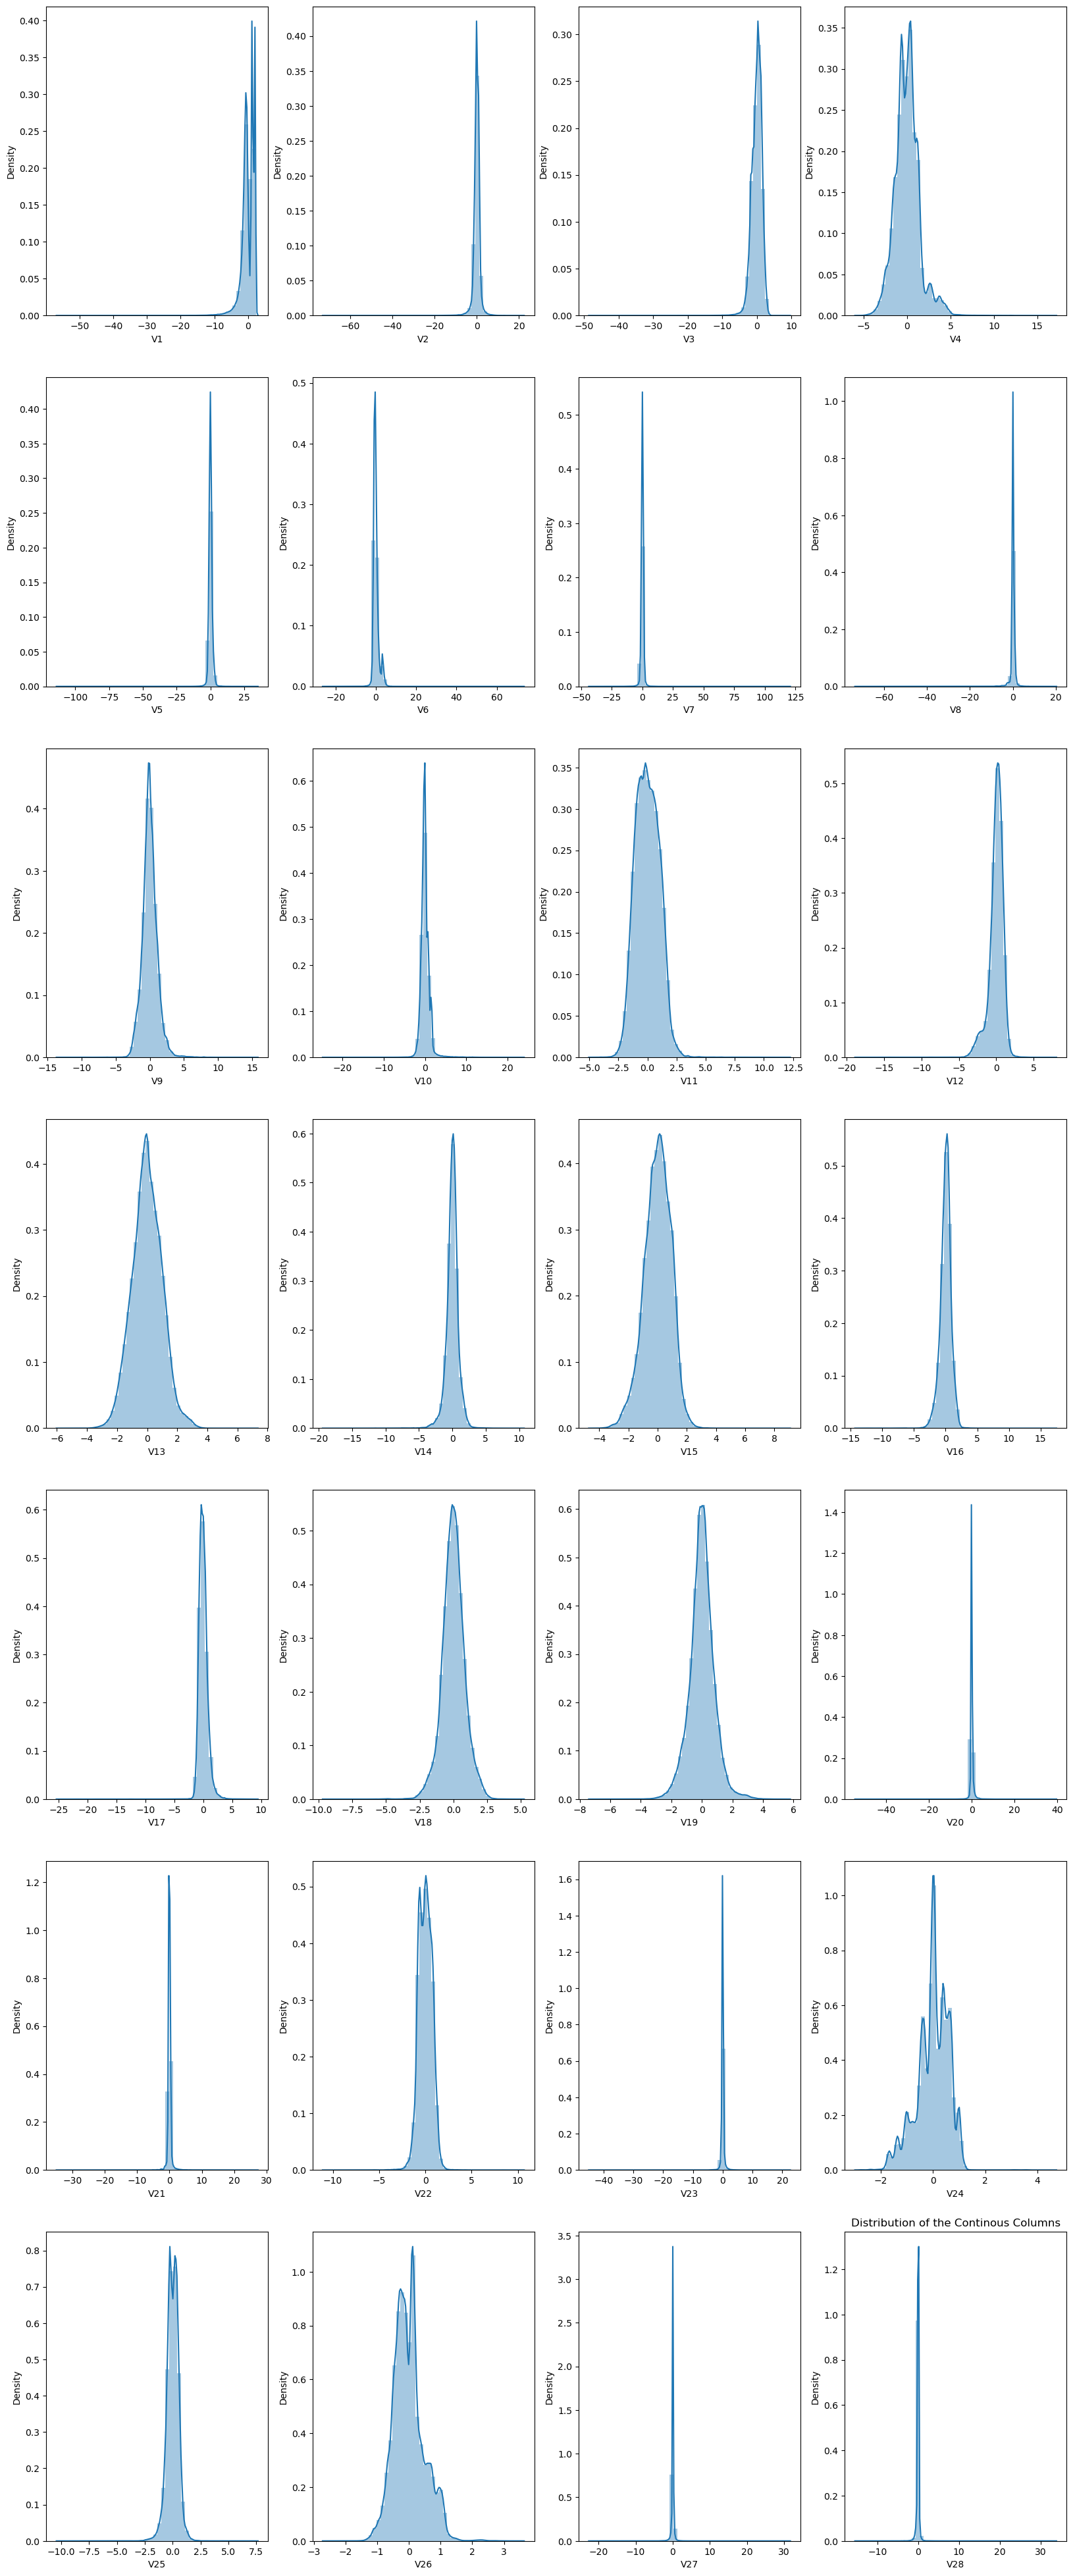

In [22]:
# collecting all continous columns
con = [f for f in data.columns if f.__contains__('V')]
# I would be using a subplot to visualize all the columns that has been transformed using PCA
fig , axes = plt.subplots(ncols = 4, nrows = 7, figsize = (20, 50))
axes = axes.flatten()
plot_index = 0
for i in range(len(con)):
    sns.distplot(data[con[i]], ax = axes[i])
plt.title('Distribution of the Continous Columns')
plt.show()

Looking at the visualization above, we can see that some columns are normally distibuted while some others are slightly skewed(left or right)
However, I would apply additional scaling to the features to ensure that they have similar ranges and distributions. This can help the model converge faster and improve its performance.

**Visaulizing the Time column**

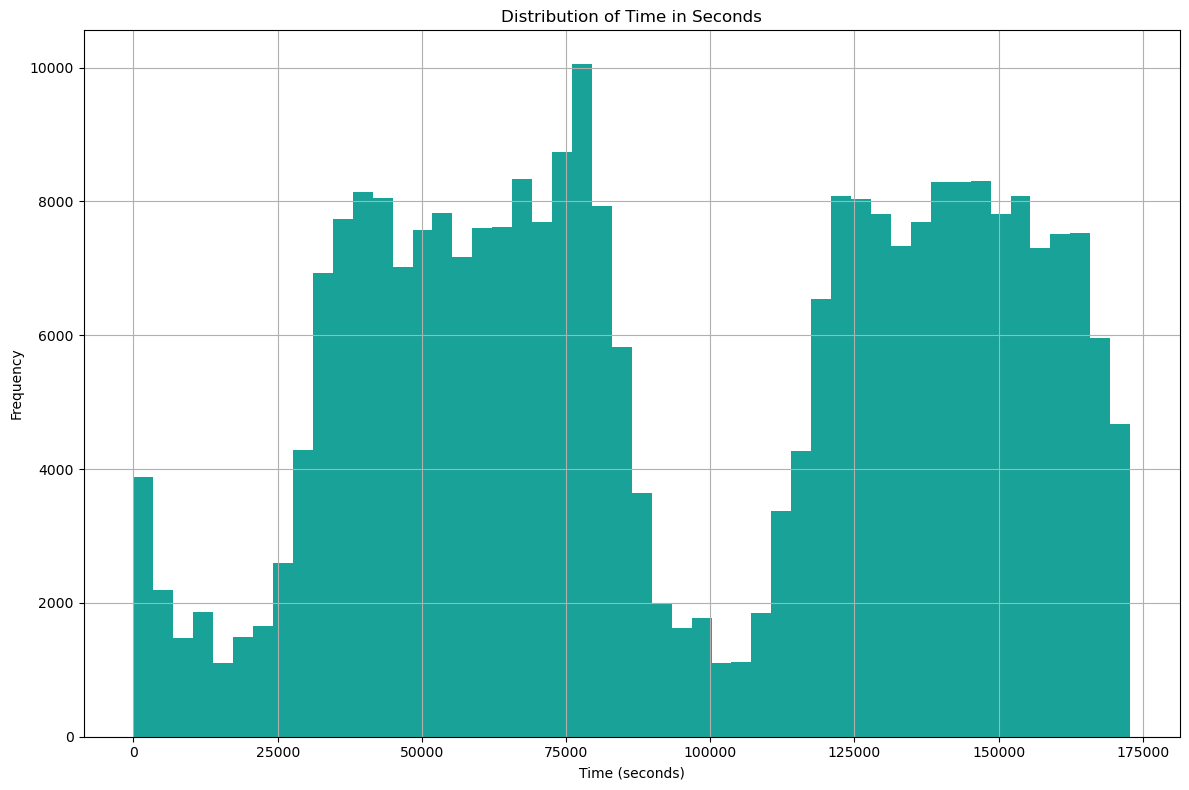

In [119]:
plt.figure(figsize = (12, 8))
plt.hist(data['Time'], bins=50, color='#18A298')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.grid()
plt.title("Distribution of Time in Seconds")
#plt.savefig('time_distribution.png')
plt.tight_layout()
plt.show()


The above plot shows the distribution of transaction times in seconds in the dataset. The x-axis represents the time in seconds, while the y-axis shows the frequency of transactions that occurred during that particular time frame. The histogram is divided into 50 bins, making it easier to interpret the data.
From the plot, we can see that the number of transactions fluctuates over time, with certain time periods experiencing more transactions than others. The distribution of transaction times is generally uniform, with a few spikes that represent the time periods with the highest transaction frequency.
Overall, this plot gives us useful insights into the distribution of transaction times, which can be helpful in identifying the time periods with the highest transaction frequency and the lowest, which can be important for resource allocation and management in the organization.

**Visualizing the Amount column**


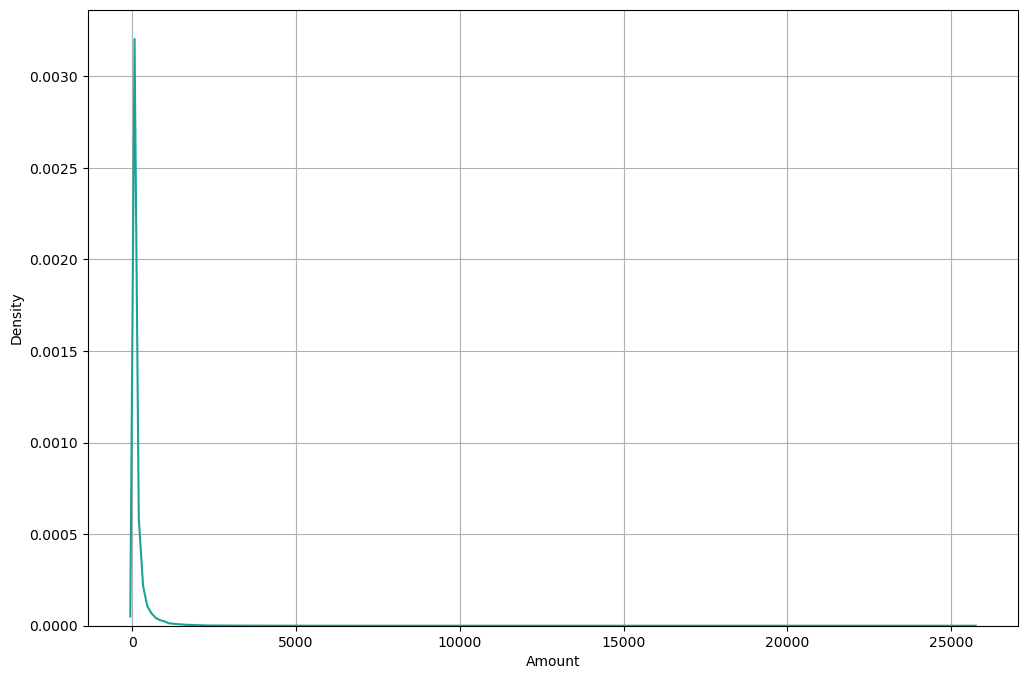

In [101]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data['Amount'], color='#18A298')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.grid()
plt.savefig('amount_kdeplot.png')
plt.show()

**Analysis**

The plot above shows the density of the Amount field in a dataset. The plot is a Kernel Density Estimation (KDE) plot, which is a non-parametric way to estimate the probability density function of a given dataset. 

The x-axis of the plot shows the different values for Amount, while the y-axis shows the density of those values. The plot is colored in a pale blue (#18A298).

The plot shows that the majority of the Amount values are concentrated around 0-1000, with some outliers reaching up to 10,000. This could indicate that most of the transactions in the dataset are of a relatively low value. 

Overall, this plot provides useful insight into the values of the Amount field in the dataset, which could be used to inform further analysis.

**Visualizing the Class column**

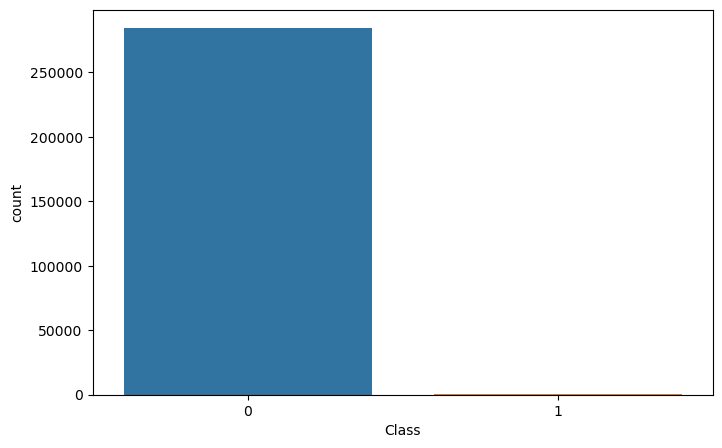

In [32]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, x = 'Class')
plt.show()

The count plot of the class column confirms that the dataset is highly imbalanced, with a significantly smaller number of fraud transactions than non-fraud transactions. This class imbalance would require special attention in developing an effective fraud detection model.

**Checking the relationship between the Class and Amount column**

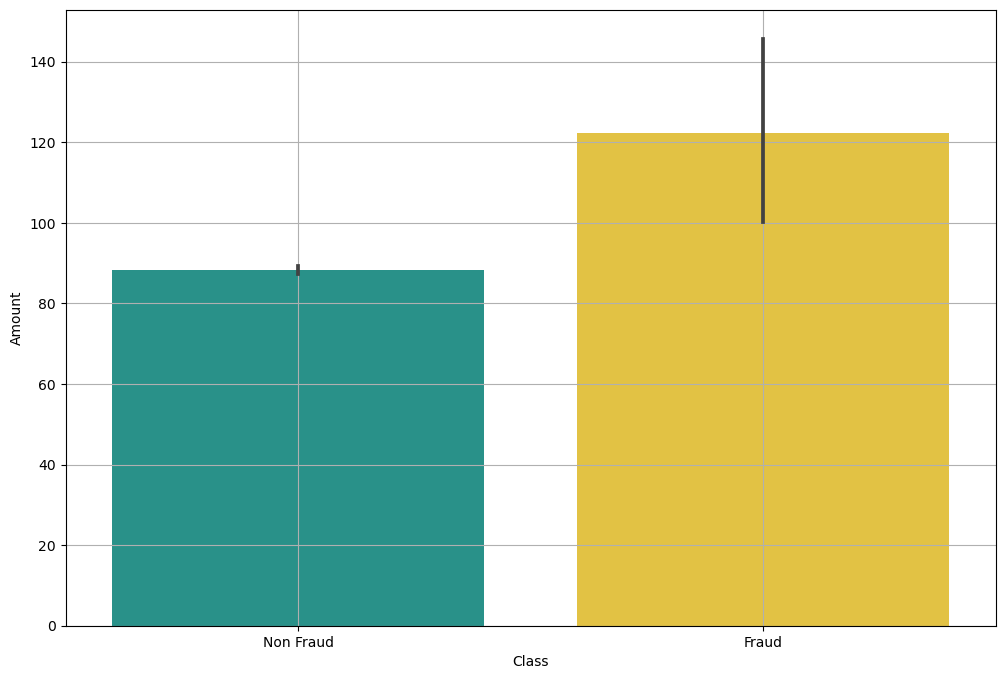

In [109]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = data, x = 'Class', y = 'Amount', palette=["#18A298", "#FCD12A"])

# Set custom x-axis tick labels
ax.set_xticklabels(['Non Fraud', 'Fraud'])

#plt.title('Relationship between the Class and Amount feature')
plt.grid()
plt.savefig('class_vs_amount.png')
plt.show()


Using a barplot to analyse the relationship between the Class feature and Amount feature, we can see that the Fraud class have a slightly higher amount on an average comapre to the non fraud class

### Data Preprocessing and Model Traning
To ensure better performance, I plan to use the Robust Scaler to scale down the data.

In [39]:
# splitting the data before scaling it 
X = data.drop(['Class'], axis = 1)
y = data['Class']

**Applying Standard Scaler**

In [45]:
# scaling the independent features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(284807, 30)

In [ ]:
# defining the classifier for test the sampling methods
clf = LogisticRegression()

In [115]:
# creating a function to check the method
def check_method(X_sample, y_sample, clf):
    # splitting the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42, stratify = y_sample)
    

    # Train your model on the oversampled or undersampled data
    clf.fit(X_sample, y_sample)

    # Use predict_proba to get the probability predictions for your test data
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    # Use precision_recall_curve to get the precision, recall, and threshold values
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Use the auc function to calculate the AUPRC score
    auprc = auc(recall, precision)
    

    # Print the AUPRC score
    print('AUPRC: %.3f' % auprc)
    print("precision", precision.mean())
    print("recall", recall.mean())

    # Plot the precision-recall curve
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()



AUPRC: 0.725


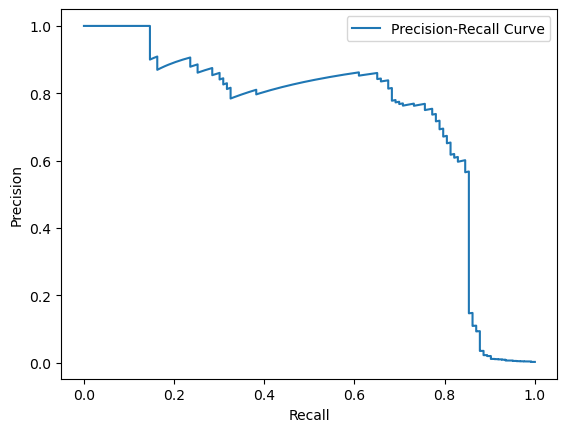

In [83]:
# Checking classifier performance
check_method(X_scaled, y, clf)

**Analysis**

The AUPRC score of 0.725 suggests that the model has performed poorly in identifying fraudulent transactions. This can be attributed to the imbalanced nature of the dataset, and it highlights the need to address this issue in order to enhance the accuracy of the classifier.

I will be employing three distinct methods to address the issue of imbalance in the dataset, in order to identify the most effective technique, which will then be used to develop the final model. These techniques are:

* Oversampling method: It involves randomly duplicating examples in the minority class to balance the distribution of examples across classes.

* Undersampling method: Undersampling is a technique used to balance imbalanced datasets by reducing the number of instances in the majority class.

* Smote method: SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling method for imbalanced datasets. SMOTE works by creating synthetic minority class samples by selecting two or more similar samples from the minority class and generating a new sample at a random point on the line joining the selected samples in the feature space. This generates new samples that are similar to existing minority class samples but are not exact copies.

I would be using the **Logistic Regression** to check each method of sampling

**Oversampling Method**

Class 0 samples: 284315
Class 1 samples: 284315
AUPRC: 0.989
precision 0.7564753821361884
recall 0.9796268707989749


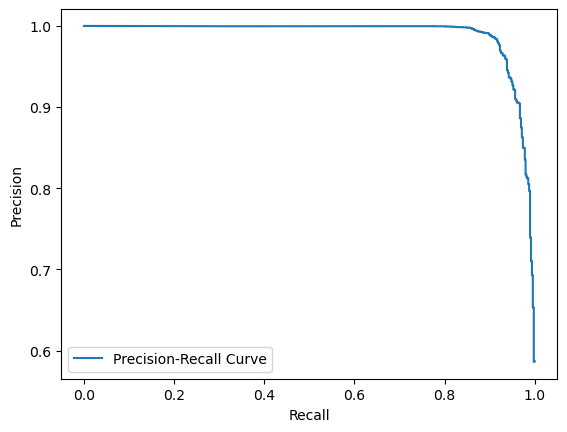

In [116]:
# Initialize the RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Print the number of samples in each class
print("Class 0 samples:", sum(y_resampled==0))
print("Class 1 samples:", sum(y_resampled==1))

# checking the AUPRC score for this method
check_method(X_resampled, y_resampled, clf)

**Analysis**

The AUPRC score of 0.989 indicates a high level of performance in correctly identifying instances of the fraudulent class. This means that the model is able to identify most of the fraudulent transactions with a high level of precision and recall.

**Undersampling Method**

Class 0 samples: 492
Class 1 samples: 492
AUPRC: 0.988
precision 0.9061292764769372
recall 0.7894531685042879


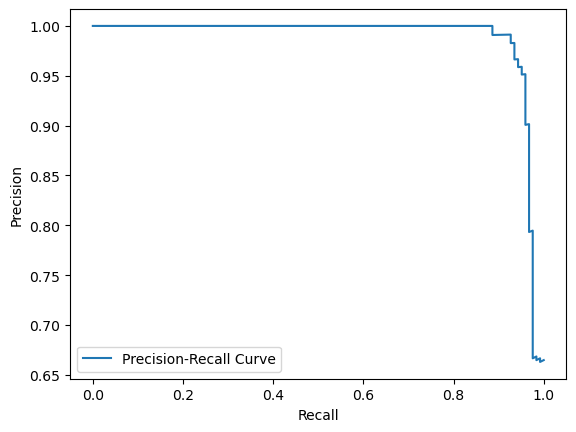

In [117]:
# define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transformation to the dataset
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Print the number of samples in each class
print("Class 0 samples:", sum(y_resampled==0))
print("Class 1 samples:", sum(y_resampled==1))

# checking the AUPRC score for this sampling method
check_method(X_resampled, y_resampled, clf)

**Analysis**

AUPRC of 0.981 indicates a relatively good performance in identifying fraudulent transactions using the undersampling method. It suggests that the model can effectively capture most of the fraudulent transactions, while also maintaining a high precision in identifying true fraudulent transactions. However, it's important to note that the AUPRC is still not perfect and there is still room for improvement.

**Smote Method**

Class 0 samples: 284315
Class 1 samples: 284315
AUPRC: 0.991
precision 0.8398692587861134
recall 0.8941131256896817


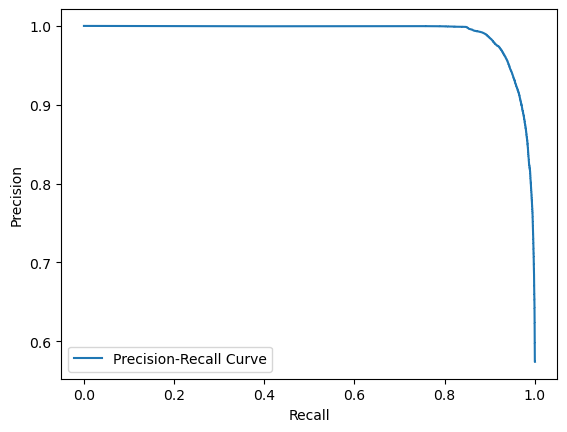

In [118]:
# Define the SMOTE model
smote = SMOTE()

# Fit the SMOTE model to the data
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Print the number of samples in each class
print("Class 0 samples:", sum(y_resampled==0))
print("Class 1 samples:", sum(y_resampled==1))

# checking the AUPRC score for this sampling method method
check_method(X_resampled, y_resampled, clf)

**Analysis**

An AUPRC of 0.991 indicates a high performance in detecting fraudulent transactions, as the model is able to achieve high precision and recall values. This suggests that the **SMOTE** method was effective in balancing the dataset and improving the classifier's accuracy in identifying fraudulent transactions.

### Conclusion

In this project, we explored a dataset of credit card transactions and built a machine learning model to detect fraudulent transactions. We started by analyzing the dataset and visualizing the distribution of features, such as transaction amount and time. We also looked at the class distribution and identified that the dataset was heavily imbalanced, with a very small number of fraudulent transactions.

To address this issue of imbalance, we experimented with different sampling techniques such as oversampling, undersampling, and SMOTE, and found that SMOTE performed the best in improving the model's performance.

We then trained a logistic regression model using the SMOTE method and evaluated its performance using the AUPRC metric. The model achieved an impressive AUPRC score of 0.989, indicating a high level of precision and recall in identifying fraudulent transactions.

In conclusion, we have successfully built a model that can accurately detect fraudulent transactions, which can be useful in real-world scenarios such as credit card fraud detection.

### Communication

To see the communication slide, please click on this <a href = 'https://www.canva.com/design/DAFe92O966w/FO3WLvQ16X5mbvfU9kclBw/view'> link</a>